# Visualize TEMPO and GEMS output 
## Part 1 - set up scenario parameters and load inputs

In [1]:
# load packages
import os
from pandas import read_csv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import shapely.wkt
import geopandas as gpd
import contextily as cx
import matplotlib
import warnings
from  matplotlib.ticker import PercentFormatter
# from rasterio.crs import CRS
warnings.filterwarnings("ignore")
#work directory is where the I-O data are stored
work_dir = '/Users/xiaodanxu/Library/CloudStorage/GoogleDrive-arielinseu@gmail.com/My Drive/GEMS/BILD-AQ/deliverables'
os.chdir(work_dir)

plt.style.use('ggplot')
sns.set(font_scale=1.2)  # larger font

# check color from default color palette
# pal = sns.color_palette()
# print(pal.as_hex())
# sns.color_palette()

<Axes: >

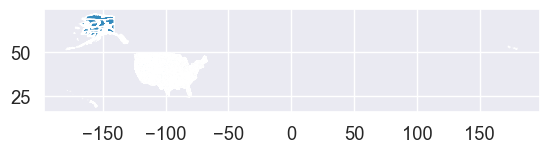

In [2]:
# prepare input and parameters
selected_states = ['CA', 'OR', 'WA']
analysis_years = ['2018', '2032']
region_code = 'PNW'
dac_designation = read_csv('Network/Joint_office_DAC_lookup.csv')

state_id_file = 'Network/ccst_geoid_key_transp_geo_with_imputation.csv'
state_id_lookup = read_csv(state_id_file)

# generate map visualization
us_tract_file = 'Network/census_tracts_2017.geojson'
us_tracts_geojson =  gpd.read_file(us_tract_file) # load shapefile of CA tracts
us_tracts_geojson.loc[:, 'home_GEOID'] = us_tracts_geojson.loc[:, 'GEOID'].astype(int)
# CA_tracts_geojson.loc[:, 'home_GEOID'] = CA_tracts_geojson.loc[:, 'GEOID'].astype(str).str.zfill(0)
#CA_tracts_geojson.head(5)
us_tracts_geojson.plot()

In [3]:
# load EV penetration
EV_penetration_by_scenario = None
scenario_name_lookup = {'Baseline': 'Baseline'}
                        # 'NEVI': 'NEVI'} 
#                         'Bookend': 'Bookend'}
# analysis_year = 2030
scenarios = list(scenario_name_lookup.keys())
scenario = 'Baseline'
for selected_state in selected_states:
    EV_penetration_dir = 'Output/' + selected_state + '/EV_penetration/'
    list_of_ev_penetration = \
    os.listdir('Output/' + selected_state + '/EV_penetration')    
    for year in analysis_years:
    #     print(file)
        file_name = 'EV_penetration_' + selected_state + '_' + \
        year + '_' + scenario + '.csv'

        scenario_output = 'Year ' + year + ' ' + \
        scenario_name_lookup[scenario]
    #     print(scenario_output)
        ev_penetration = read_csv(EV_penetration_dir + '/' + file_name)
        ev_penetration.loc[:, 'scenario'] = scenario_output
        ev_penetration.loc[:, 'year'] = year
        ev_penetration.loc[:, 'state'] = selected_state
        ev_penetration.loc[:, 'type'] = scenario_name_lookup[scenario]

        EV_penetration_by_scenario = pd.concat([EV_penetration_by_scenario, 
                                                ev_penetration])
    #     break
#     EV_penetration_by_scenario.head(5)    

EV_penetration_by_scenario.loc[:, 'EV_count'] = \
EV_penetration_by_scenario.loc[:, 'Total'] * \
(EV_penetration_by_scenario.loc[:, 'BEV_100'] + \
 EV_penetration_by_scenario.loc[:, 'BEV_300'] + \
 EV_penetration_by_scenario.loc[:, 'FCEV'] + \
EV_penetration_by_scenario.loc[:, 'PHEV_25'] + \
 EV_penetration_by_scenario.loc[:, 'PHEV_50'])
print(EV_penetration_by_scenario.scenario.unique())
EV_penetration_by_scenario.head(5)

['Year 2018 Baseline' 'Year 2032 Baseline']


,home_GEOID,BEV_100,BEV_300,FCEV,HEV_Gasoline,ICEV_Gasoline,ICEV_NG,PHEV_25,PHEV_50,Total,scenario,year,state,type,EV_count
0,6001400100,0.012001,0.006487,0.000000,0.051898,0.919883,0.000324,0.004865,0.004541,3083.0,Year 2018 Baseline,2018,CA,Baseline,86.0
1,6001400200,0.011572,0.006807,0.000000,0.052417,0.919673,0.000000,0.004765,0.004765,1469.0,Year 2018 Baseline,2018,CA,Baseline,41.0
2,6001400300,0.011914,0.006734,0.000259,0.051800,0.919192,0.000259,0.005180,0.004662,3861.0,Year 2018 Baseline,2018,CA,Baseline,111.0
3,6001400400,0.012065,0.007097,0.000000,0.051810,0.919092,0.000355,0.004968,0.004613,2818.0,Year 2018 Baseline,2018,CA,Baseline,81.0
4,6001400500,0.011969,0.006564,0.000000,0.051737,0.919305,0.000386,0.005405,0.004633,2590.0,Year 2018 Baseline,2018,CA,Baseline,74.0


In [4]:
EV_VMT_by_scenario = None

for selected_state in selected_states:
    EV_penetration_dir = 'Output/' + selected_state + '/EV_VMT/'
    list_of_ev_vmt = os.listdir('Output/' + selected_state + '/EV_VMT')
    for year in analysis_years:
    #     print(file)
        file_name = 'raw_VMT_' + selected_state + '_' + \
        year + '_' + scenario + '.csv'

        scenario_output = 'Year ' + year + ' ' + scenario_name_lookup[scenario]
    #     print(scenario_output)
        ev_vmt = read_csv(EV_penetration_dir + '/' + file_name)
        ev_vmt.loc[:, 'scenario'] = scenario_output
        ev_vmt.loc[:, 'year'] = year
#         ev_vmt.loc[:, 'state'] = selected_state
        ev_vmt.loc[:, 'type'] = scenario_name_lookup[scenario]
        EV_VMT_by_scenario = pd.concat([EV_VMT_by_scenario, ev_vmt])
#     break
print(EV_VMT_by_scenario.scenario.unique())
EV_VMT_by_scenario.head(5)    

['Year 2018 Baseline' 'Year 2032 Baseline']


,thru_GEOID,thru_geotype,thru_microtype,BEV_100,BEV_300,FCEV,HEV_Gasoline,ICEV_Gasoline,ICEV_NG,PHEV_25,PHEV_50,VMT,scenario,year,type
0,4001942600,C,6.0,65.574431,85.466094,0.0,735.454174,32276.787730,4.588392,57.216881,53.036100,33278.123801,Year 2018 Baseline,2018,Baseline
1,4001942700,C,6.0,159.173940,206.264645,0.0,1764.763756,77522.033614,10.820090,138.219985,128.524020,79929.800049,Year 2018 Baseline,2018,Baseline
2,4001944000,C,5.0,13.002401,16.886431,0.0,143.818839,6104.078659,0.863695,11.282402,10.484739,6300.417166,Year 2018 Baseline,2018,Baseline
3,4001944100,C,5.0,41.362963,53.611391,0.0,460.653834,20118.379869,2.799325,35.885031,33.373016,20746.065428,Year 2018 Baseline,2018,Baseline
4,4001944201,C,6.0,62.296605,81.075669,0.0,698.238031,30861.607704,4.402155,54.266319,50.365431,31812.251914,Year 2018 Baseline,2018,Baseline


In [5]:
group_var = ['thru_GEOID', 'thru_geotype', 'thru_microtype', 'scenario', 'year', 'type']
EV_VMT_by_scenario = EV_VMT_by_scenario.groupby(group_var).sum()
EV_VMT_by_scenario = EV_VMT_by_scenario.reset_index()
EV_VMT_by_scenario.head(5)

,thru_GEOID,thru_geotype,thru_microtype,scenario,year,type,BEV_100,BEV_300,FCEV,HEV_Gasoline,ICEV_Gasoline,ICEV_NG,PHEV_25,PHEV_50,VMT
0,4001942600,C,6.0,Year 2018 Baseline,2018,Baseline,65.574431,85.466094,0.000000,735.454174,32276.787730,4.588392,57.216881,53.036100,33278.123801
1,4001942600,C,6.0,Year 2032 Baseline,2032,Baseline,777.394185,9140.699359,22.113611,840.224249,21849.619129,11.279983,142.053455,494.739830,33278.123801
2,4001942700,C,6.0,Year 2018 Baseline,2018,Baseline,159.173940,206.264645,0.000000,1764.763756,77522.033614,10.820090,138.219985,128.524020,79929.800049
3,4001942700,C,6.0,Year 2032 Baseline,2032,Baseline,1866.416005,21947.822715,53.183011,2019.188583,52485.722351,26.820977,342.451392,1188.195016,79929.800049
4,4001944000,C,5.0,Year 2018 Baseline,2018,Baseline,13.002401,16.886431,0.000000,143.818839,6104.078659,0.863695,11.282402,10.484739,6300.417166


In [6]:
state_id_lookup.head(5)
state_lookup = state_id_lookup[['GEOID', 'st_code']]
EV_VMT_by_scenario = pd.merge(EV_VMT_by_scenario, state_lookup,
                             left_on = 'thru_GEOID', 
                              right_on = 'GEOID', how = 'left')
EV_VMT_by_scenario = EV_VMT_by_scenario.drop(columns = 'GEOID')
EV_VMT_by_scenario = EV_VMT_by_scenario.rename(columns = {'st_code':'state'})
EV_VMT_by_scenario.head(5)

,thru_GEOID,thru_geotype,thru_microtype,scenario,year,type,BEV_100,BEV_300,FCEV,HEV_Gasoline,ICEV_Gasoline,ICEV_NG,PHEV_25,PHEV_50,VMT,state
0,4001942600,C,6.0,Year 2018 Baseline,2018,Baseline,65.574431,85.466094,0.000000,735.454174,32276.787730,4.588392,57.216881,53.036100,33278.123801,AZ
1,4001942600,C,6.0,Year 2032 Baseline,2032,Baseline,777.394185,9140.699359,22.113611,840.224249,21849.619129,11.279983,142.053455,494.739830,33278.123801,AZ
2,4001942700,C,6.0,Year 2018 Baseline,2018,Baseline,159.173940,206.264645,0.000000,1764.763756,77522.033614,10.820090,138.219985,128.524020,79929.800049,AZ
3,4001942700,C,6.0,Year 2032 Baseline,2032,Baseline,1866.416005,21947.822715,53.183011,2019.188583,52485.722351,26.820977,342.451392,1188.195016,79929.800049,AZ
4,4001944000,C,5.0,Year 2018 Baseline,2018,Baseline,13.002401,16.886431,0.000000,143.818839,6104.078659,0.863695,11.282402,10.484739,6300.417166,AZ


In [7]:
# attach DAC attribute
print(dac_designation.columns)

dac_designation_short = dac_designation[['GEOID', 'POPULATION', 'NEVI_DAC']]
dac_designation_short.head(4)

EV_penetration_by_scenario = pd.merge(EV_penetration_by_scenario, 
                                      dac_designation_short,
                                      left_on = 'home_GEOID', 
                                      right_on = 'GEOID',
                                      how = 'left')

EV_VMT_by_scenario = pd.merge(EV_VMT_by_scenario, 
                              dac_designation_short,
                              left_on = 'thru_GEOID', 
                              right_on = 'GEOID',
                              how = 'left')

EV_VMT_by_scenario.head(5)

Index(['GEOID', 'CITY', 'COUNTY', 'STATEABB', 'COUNTYFIPS', 'CBSA', 'CBSANAME',
       'STATEFIPS', 'POPULATION', 'DOE_DAC',
       ...
       'EconomyDis', 'EquityDis', 'Resilien_1', 'EnviroDis', 'SumDis',
       'DOT_DAC', 'Shape_Leng', 'Shape_Area', 'Count', 'NEVI_DAC'],
      dtype='object', length=129)


,thru_GEOID,thru_geotype,thru_microtype,scenario,year,type,BEV_100,BEV_300,FCEV,HEV_Gasoline,ICEV_Gasoline,ICEV_NG,PHEV_25,PHEV_50,VMT,state,GEOID,POPULATION,NEVI_DAC
0,4001942600,C,6.0,Year 2018 Baseline,2018,Baseline,65.574431,85.466094,0.000000,735.454174,32276.787730,4.588392,57.216881,53.036100,33278.123801,AZ,4001942600,1742.0,1.0
1,4001942600,C,6.0,Year 2032 Baseline,2032,Baseline,777.394185,9140.699359,22.113611,840.224249,21849.619129,11.279983,142.053455,494.739830,33278.123801,AZ,4001942600,1742.0,1.0
2,4001942700,C,6.0,Year 2018 Baseline,2018,Baseline,159.173940,206.264645,0.000000,1764.763756,77522.033614,10.820090,138.219985,128.524020,79929.800049,AZ,4001942700,5345.0,1.0
3,4001942700,C,6.0,Year 2032 Baseline,2032,Baseline,1866.416005,21947.822715,53.183011,2019.188583,52485.722351,26.820977,342.451392,1188.195016,79929.800049,AZ,4001942700,5345.0,1.0
4,4001944000,C,5.0,Year 2018 Baseline,2018,Baseline,13.002401,16.886431,0.000000,143.818839,6104.078659,0.863695,11.282402,10.484739,6300.417166,AZ,4001944000,6547.0,1.0


In [8]:
# post-process EV VMT results
EV_VMT_by_scenario.loc[:, 'ICEV_VMT'] = EV_VMT_by_scenario.loc[:, 'HEV_Gasoline'] + \
EV_VMT_by_scenario.loc[:, 'ICEV_Gasoline'] + EV_VMT_by_scenario.loc[:, 'ICEV_NG'] + \
0.78 * EV_VMT_by_scenario.loc[:, 'PHEV_25'] + 0.38 * EV_VMT_by_scenario.loc[:, 'PHEV_50'] 

EV_VMT_by_scenario.loc[:, 'BEV_VMT'] = EV_VMT_by_scenario.loc[:, 'BEV_100'] + \
EV_VMT_by_scenario.loc[:, 'BEV_300'] + EV_VMT_by_scenario.loc[:, 'FCEV'] + \
0.22 * EV_VMT_by_scenario.loc[:, 'PHEV_25'] + 0.62 * EV_VMT_by_scenario.loc[:, 'PHEV_50'] 

EV_VMT_by_scenario.loc[:, 'ICEV_VMT_fraction'] = EV_VMT_by_scenario.loc[:, 'ICEV_VMT'] / \
EV_VMT_by_scenario.loc[:, 'VMT']

EV_VMT_by_scenario.loc[:, 'BEV_VMT_fraction'] = EV_VMT_by_scenario.loc[:, 'BEV_VMT'] / \
EV_VMT_by_scenario.loc[:, 'VMT']

EV_VMT_by_scenario.head(5)

,thru_GEOID,thru_geotype,thru_microtype,scenario,year,type,BEV_100,BEV_300,FCEV,HEV_Gasoline,...,PHEV_50,VMT,state,GEOID,POPULATION,NEVI_DAC,ICEV_VMT,BEV_VMT,ICEV_VMT_fraction,BEV_VMT_fraction
0,4001942600,C,6.0,Year 2018 Baseline,2018,Baseline,65.574431,85.466094,0.000000,735.454174,...,53.036100,33278.123801,AZ,4001942600,1742.0,1.0,33081.613181,196.510620,0.994095,0.005905
1,4001942600,C,6.0,Year 2032 Baseline,2032,Baseline,777.394185,9140.699359,22.113611,840.224249,...,494.739830,33278.123801,AZ,4001942600,1742.0,1.0,22999.926192,10278.197609,0.691143,0.308857
2,4001942700,C,6.0,Year 2018 Baseline,2018,Baseline,159.173940,206.264645,0.000000,1764.763756,...,128.524020,79929.800049,AZ,4001942700,5345.0,1.0,79454.268175,475.531874,0.994051,0.005949
3,4001942700,C,6.0,Year 2032 Baseline,2032,Baseline,1866.416005,21947.822715,53.183011,2019.188583,...,1188.195016,79929.800049,AZ,4001942700,5345.0,1.0,55250.358102,24679.441947,0.691236,0.308764
4,4001944000,C,5.0,Year 2018 Baseline,2018,Baseline,13.002401,16.886431,0.000000,143.818839,...,10.484739,6300.417166,AZ,4001944000,6547.0,1.0,6261.545667,38.871499,0.993830,0.006170


## Part 2 -- Generation bar charts

   year       BEV_VMT    VMT change
0  2018  1.238776e+07  0.000000e+00
1  2032  3.402014e+08  3.278136e+08


,year,BEV_VMT,VMT change
1,2032,3.402014e+08,3.278136e+08


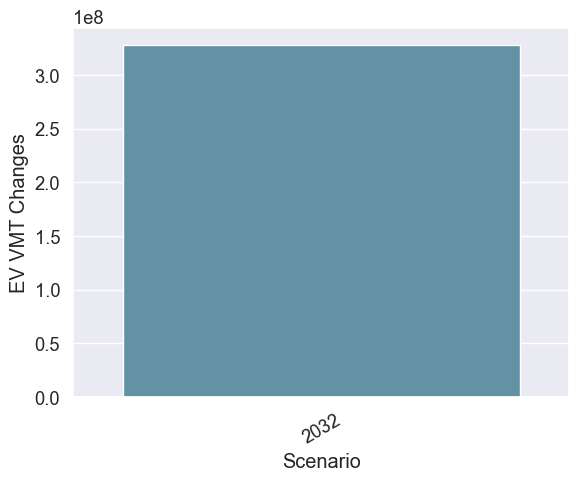

In [9]:
# plot the change of VMT

EV_VMT_comparison = EV_VMT_by_scenario.groupby(['year'])[['BEV_VMT']].sum()
EV_VMT_comparison = EV_VMT_comparison.reset_index()

EV_VMT_comparison.loc[:, 'VMT change'] = 0

EV_VMT_comparison.loc[EV_VMT_comparison['year'] == '2032', 'VMT change'] = \
float(EV_VMT_comparison.loc[EV_VMT_comparison['year'] == '2032', 'BEV_VMT']) - \
float(EV_VMT_comparison.loc[EV_VMT_comparison['year'] == '2018', 'BEV_VMT'])
print(EV_VMT_comparison)
EV_VMT_comparison = EV_VMT_comparison.loc[EV_VMT_comparison['year'] != '2018']
EV_VMT_comparison = EV_VMT_comparison.sort_values(by = 'year', ascending = False)

sns.barplot(x = "year", y = "VMT change", data = EV_VMT_comparison, 
            color = '#5797af', alpha = 1)
# # plt.title('EV VMT difference (scenario - baseline)')
plt.xticks(rotation = 30)
plt.xlabel('Scenario')
plt.ylabel('EV VMT Changes')
plt.savefig('Plot/' + region_code + '/' + region_code + '_EV_VMT_delta.png', 
            dpi = 200, bbox_inches = 'tight')
# # plt.show()
EV_VMT_comparison.head(5)

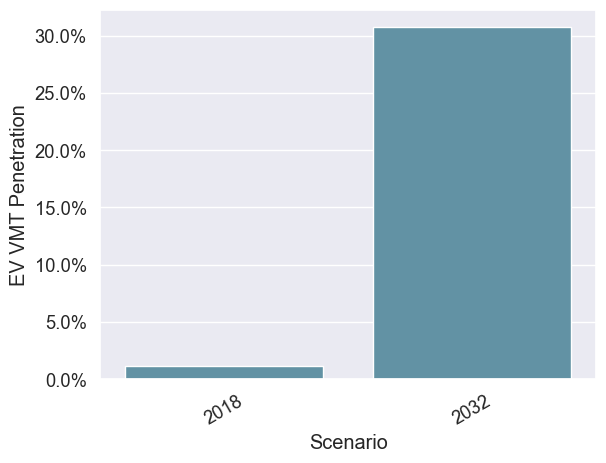

   year       BEV_VMT           VMT  VMT fraction
0  2018  1.238776e+07  1.106557e+09      0.011195
1  2032  3.402014e+08  1.106557e+09      0.307441


In [13]:
# plot the change of VMT fraction

VMT_comparison = EV_VMT_by_scenario.groupby(['year'])[['BEV_VMT', 'VMT']].sum()

VMT_comparison = VMT_comparison.reset_index()
VMT_comparison.loc[:, 'VMT fraction'] = \
VMT_comparison.loc[:, 'BEV_VMT'] / VMT_comparison.loc[:, 'VMT']

ax = sns.barplot(x = "year", y = "VMT fraction", data = VMT_comparison, 
            color = '#5797af', alpha = 1)
# # plt.title('EV VMT difference (scenario - baseline)')
plt.xticks(rotation = 30)
plt.xlabel('Scenario')
plt.ylabel('EV VMT Penetration')
vals = ax.get_yticks()
ax.set_yticklabels(['{:,.1%}'.format(x) for x in vals])
plt.savefig('Plot/' + region_code + '/' + region_code + '_EV_VMT_frac.png', 
            dpi = 200, bbox_inches = 'tight')
plt.show()
print(VMT_comparison)
# VMT_comparison.loc[:, 'VMT frac change'] = 0

# VMT_comparison.loc[VMT_comparison['year'] == '2032', 'VMT frac change'] = \
# float(VMT_comparison.loc[VMT_comparison['year'] == '2032', 'VMT fraction']) - \
# float(VMT_comparison.loc[VMT_comparison['year'] == '2018', 'VMT fraction'])

# VMT_comparison = VMT_comparison.loc[VMT_comparison['year'] != '2018']
# VMT_comparison = VMT_comparison.sort_values(by = 'year', ascending = False)

# ax = sns.barplot(x = "year", y = "VMT frac change", data = VMT_comparison, 
#             color = '#5797af', alpha = 1)
# # # plt.title('EV VMT difference (scenario - baseline)')
# plt.xticks(rotation = 30)
# plt.xlabel('Scenario')
# plt.ylabel('EV VMT Penetration Changes')
# vals = ax.get_yticks()
# ax.set_yticklabels(['{:,.1%}'.format(x) for x in vals])
# plt.savefig('Plot/' + region_code + '/' + region_code + '_EV_VMT_frac_delta.png', 
#             dpi = 200, bbox_inches = 'tight')
# plt.show()


   index state       Scenario  EV VMT penetration
0      0    CA  2018 baseline            0.013158
1      1    OR  2018 baseline            0.004546
2      2    WA  2018 baseline            0.006053
3      3    CA  2032 forecast            0.317245
4      4    OR  2032 forecast            0.283105
5      5    WA  2032 forecast            0.269768


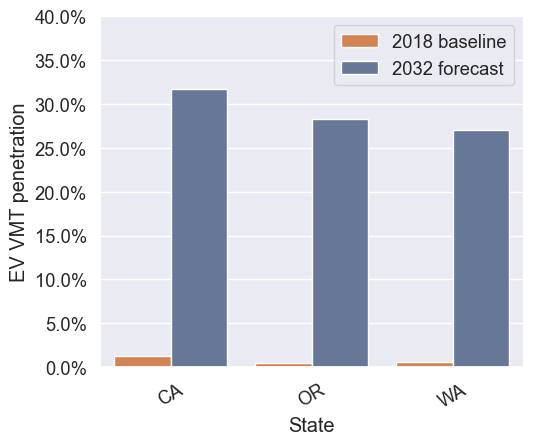

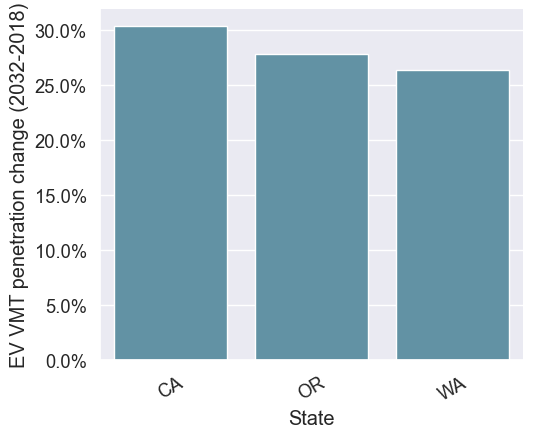

,state,EV VMT baseline,EV VMT forecast,VMT baseline,VMT forecast,2018 baseline,2032 forecast,VMT penetration change
1,CA,1.061349e+07,2.558891e+08,8.065971e+08,8.065971e+08,0.013158,0.317245,0.304087
5,OR,3.497643e+05,2.178412e+07,7.694727e+07,7.694727e+07,0.004546,0.283105,0.278559
7,WA,8.756337e+05,3.902326e+07,1.446549e+08,1.446549e+08,0.006053,0.269768,0.263715


In [22]:
# Plot the VMT fraction changes by state
VMT_comparison_by_dac = \
pd.pivot_table(EV_VMT_by_scenario, values=['BEV_VMT', 'VMT'], 
               index=['state'], 
               columns=['year'], aggfunc=np.sum, fill_value=0)
VMT_comparison_by_dac = VMT_comparison_by_dac.reset_index()
VMT_comparison_by_dac.columns = ['state', 'EV VMT baseline', 'EV VMT forecast', 
                                 'VMT baseline', 'VMT forecast']

VMT_comparison_by_dac['2018 baseline'] = \
VMT_comparison_by_dac['EV VMT baseline'] / \
VMT_comparison_by_dac['VMT baseline']
VMT_comparison_by_dac['2032 forecast'] = \
VMT_comparison_by_dac['EV VMT forecast'] / \
VMT_comparison_by_dac['VMT forecast']

colors = ["#e7803e", "#5f74a0"]
sns.set_palette(sns.color_palette(colors))
VMT_comparison_by_dac = \
VMT_comparison_by_dac.loc[VMT_comparison_by_dac['state'].isin(selected_states)]
# Set your custom color palette

VMT_comparison_to_plot = pd.melt(VMT_comparison_by_dac,
                                 id_vars = ['state'],
                                 value_vars = ['2018 baseline', 
                                               '2032 forecast'],
                                 var_name = 'Scenario',
                                 value_name = 'EV VMT penetration')
VMT_comparison_to_plot = VMT_comparison_to_plot.reset_index()
VMT_comparison_to_plot = \
VMT_comparison_to_plot[VMT_comparison_to_plot['state'].isin(selected_states)]
                                 
sns.set_palette(sns.color_palette(colors))
# plt.figure(figsize = (5, 10))
ax = sns.catplot(kind = 'bar', data = VMT_comparison_to_plot,
            x = 'state', y = 'EV VMT penetration', 
            hue = 'Scenario', 
            height=4.5, aspect=1.2, legend_out = False)
plt.xticks(rotation = 30)
plt.xlabel('State')
plt.ylabel('EV VMT penetration')
plt.legend(loc = 1)
plt.ylim([0,0.4])
for ax in ax.axes.flat:
    ax.yaxis.set_major_formatter(PercentFormatter(1))
plt.savefig('Plot/' + region_code + '/' + region_code + 'EV_VMT_frac.png', 
            dpi = 200, bbox_inches = 'tight')
print(VMT_comparison_to_plot)

VMT_comparison_by_dac['VMT penetration change'] = \
VMT_comparison_by_dac['2032 forecast'] - \
VMT_comparison_by_dac['2018 baseline']

# Create an array with the colors you want to use

VMT_comparison_by_dac = \
VMT_comparison_by_dac.loc[VMT_comparison_by_dac['state'].isin(selected_states)]
# VMT_comparison_by_dac['DAC status'] = VMT_comparison_by_dac['DAC status'].astype(int)
# Set your custom color palette
sns.set_palette(sns.color_palette(colors))
# plt.figure(figsize = (5, 10))
ax = sns.catplot(kind = 'bar', data = VMT_comparison_by_dac,
            x = 'state', y = 'VMT penetration change', 
            color = '#5797af', 
            height=4.5, aspect=1.2)
plt.xticks(rotation = 30)
plt.xlabel('State')
plt.ylabel('EV VMT penetration change (2032-2018)')
for ax in ax.axes.flat:
    ax.yaxis.set_major_formatter(PercentFormatter(1))
plt.savefig('Plot/' + region_code + '/' + region_code + 'EV_VMT_frac_delta.png', 
            dpi = 200, bbox_inches = 'tight')

plt.show()
VMT_comparison_by_dac.head(5)

   year    EV_count
0  2018    578596.0
1  2032  12300007.0


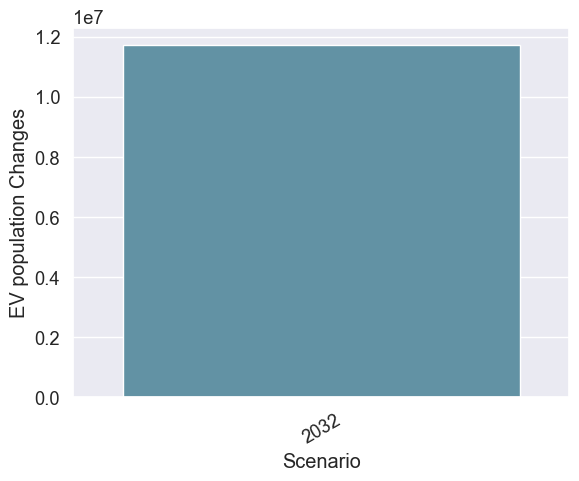

In [23]:
# Plot EV population changes

EV_pop_comparison = EV_penetration_by_scenario.groupby(['year'])[['EV_count']].sum()
# pd.pivot_table(EV_VMT_by_scenario, values='BEV_VMT', 
#                                    index=['year'], 
#                                    columns=['type'], aggfunc=np.sum, 
#                                    fill_value=0)
EV_pop_comparison = EV_pop_comparison.reset_index()
print(EV_pop_comparison)
EV_pop_comparison.loc[:, 'population change'] = 0

EV_pop_comparison.loc[EV_pop_comparison['year'] == '2032', 'population change'] = \
float(EV_pop_comparison.loc[EV_pop_comparison['year'] == '2032', 'EV_count']) - \
float(EV_pop_comparison.loc[EV_pop_comparison['year'] == '2018', 'EV_count'])


EV_pop_comparison = EV_pop_comparison.loc[EV_pop_comparison['year'] != '2018']
EV_pop_comparison = EV_pop_comparison.sort_values(by = 'year', ascending = False)

sns.barplot(x = "year", y = "population change", data = EV_pop_comparison, 
            color = '#5797af', alpha = 1)
# # plt.title('EV VMT difference (scenario - baseline)')
plt.xticks(rotation = 30)
plt.xlabel('Scenario')
plt.ylabel('EV population Changes')
plt.savefig('Plot/' + region_code + '/' + region_code + '_EV_population_delta.png', 
            dpi = 200, bbox_inches = 'tight')

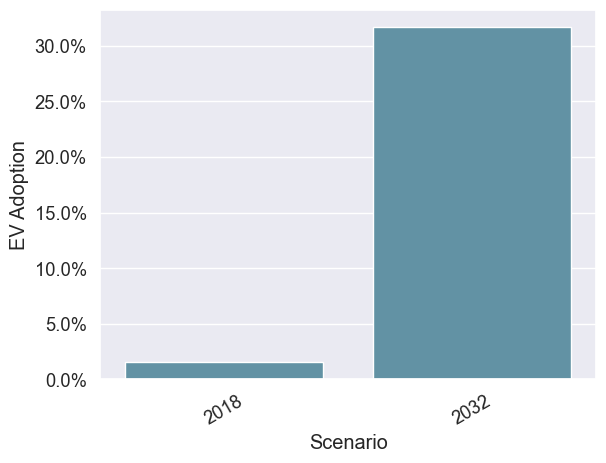

   year    EV_count       Total  EV fraction
0  2018    578596.0  37883021.0     0.015273
1  2032  12300007.0  38816004.0     0.316880


In [25]:
# plot EV penetration change

population_comparison = \
EV_penetration_by_scenario.groupby(['year'])[['EV_count', 'Total']].sum()

population_comparison = population_comparison.reset_index()
population_comparison.loc[:, 'EV fraction'] = \
population_comparison.loc[:, 'EV_count'] / population_comparison.loc[:, 'Total']

ax = sns.barplot(x = "year", y = "EV fraction", data = population_comparison, 
            color = '#5797af', alpha = 1)
# # plt.title('EV VMT difference (scenario - baseline)')
plt.xticks(rotation = 30)
plt.xlabel('Scenario')
plt.ylabel('EV Adoption')
vals = ax.get_yticks()
ax.set_yticklabels(['{:,.1%}'.format(x) for x in vals])
plt.savefig('Plot/' + region_code + '/' + region_code + '_EV_population_frac.png', 
            dpi = 200, bbox_inches = 'tight')
plt.show()
print(population_comparison)

# population_comparison.loc[:, 'EV frac change'] = 0

# population_comparison.loc[population_comparison['year'] == '2032', 'EV frac change'] = \
# float(population_comparison.loc[population_comparison['year'] == '2032', 'EV fraction']) - \
# float(population_comparison.loc[population_comparison['year'] == '2018', 'EV fraction'])


# population_comparison = population_comparison.loc[population_comparison['year'] != '2018']
# population_comparison = population_comparison.sort_values(by = 'year', ascending = False)

# ax = sns.barplot(x = "year", y = "EV frac change", data = population_comparison, 
#             color = '#5797af', alpha = 1)
# # # plt.title('EV VMT difference (scenario - baseline)')
# plt.xticks(rotation = 30)
# plt.xlabel('Scenario')
# plt.ylabel('EV Adoption Changes')
# vals = ax.get_yticks()
# ax.set_yticklabels(['{:,.1%}'.format(x) for x in vals])
# plt.savefig('Plot/' + region_code + '/' + region_code + '_EV_population_frac_delta.png', 
#             dpi = 200, bbox_inches = 'tight')



   index state       Scenario  EV Adoption
0      0    CA  2018 baseline     0.017587
1      1    OR  2018 baseline     0.007234
2      2    WA  2018 baseline     0.008024
3      3    CA  2032 forecast     0.327206
4      4    OR  2032 forecast     0.293110
5      5    WA  2032 forecast     0.280513


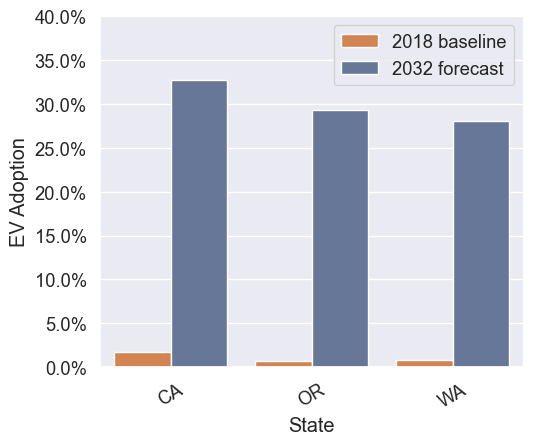

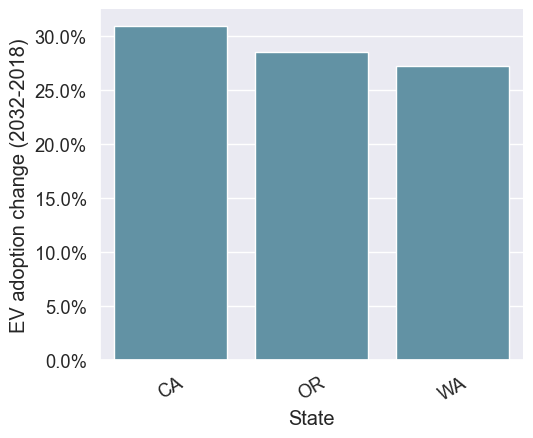

In [26]:
# Plot the ev penetration changes by dac

EV_frac_comparison_by_dac = \
pd.pivot_table(EV_penetration_by_scenario, values=['EV_count', 'Total'], 
               index=['state'], 
               columns=['year'], aggfunc=np.sum, fill_value=0)
EV_frac_comparison_by_dac = EV_frac_comparison_by_dac.reset_index()
EV_frac_comparison_by_dac.columns = ['state', 'EV baseline',
                                     'EV forecast', 
                                     'Total baseline', 
                                     'Total forecast']

EV_frac_comparison_by_dac['2018 baseline'] = \
EV_frac_comparison_by_dac['EV baseline'] / \
EV_frac_comparison_by_dac['Total baseline']
EV_frac_comparison_by_dac['2032 forecast'] = \
EV_frac_comparison_by_dac['EV forecast'] / \
EV_frac_comparison_by_dac['Total forecast']

colors = ["#e7803e", "#5f74a0"]
sns.set_palette(sns.color_palette(colors))
# Set your custom color palette

EV_adoption_to_plot = pd.melt(EV_frac_comparison_by_dac,
                                 id_vars = ['state'],
                                 value_vars = ['2018 baseline', 
                                               '2032 forecast'],
                                 var_name = 'Scenario',
                                 value_name = 'EV Adoption')
EV_adoption_to_plot = EV_adoption_to_plot.reset_index()
EV_adoption_to_plot = \
EV_adoption_to_plot[EV_adoption_to_plot['state'].isin(selected_states)]
                                 
sns.set_palette(sns.color_palette(colors))
# plt.figure(figsize = (5, 10))
ax = sns.catplot(kind = 'bar', data = EV_adoption_to_plot,
            x = 'state', y = 'EV Adoption', 
            hue = 'Scenario', 
            height=4.5, aspect=1.2, legend_out = False)
plt.xticks(rotation = 30)
plt.xlabel('State')
plt.ylabel('EV Adoption')
plt.legend(loc = 1)
plt.ylim([0,0.4])
for ax in ax.axes.flat:
    ax.yaxis.set_major_formatter(PercentFormatter(1))
plt.savefig('Plot/' + region_code + '/' + region_code + 'EV_frac.png', 
            dpi = 200, bbox_inches = 'tight')
print(EV_adoption_to_plot)


EV_frac_comparison_by_dac['EV adoption change'] = \
EV_frac_comparison_by_dac['2032 forecast'] - \
EV_frac_comparison_by_dac['2018 baseline']


EV_frac_comparison_by_dac = \
EV_frac_comparison_by_dac.loc[EV_frac_comparison_by_dac['state'].isin(selected_states)]
# EV_frac_comparison_by_dac['DAC status'] = EV_frac_comparison_by_dac['DAC status'].astype(int)
colors = ["#e7803e", "#5f74a0"]
# Set your custom color palette
sns.set_palette(sns.color_palette(colors))
# plt.figure(figsize = (5, 10))
ax = sns.catplot(kind = 'bar', 
                 data = EV_frac_comparison_by_dac,
                 x = 'state', y = 'EV adoption change', 
                 color = '#5797af', 
                 height=4.5, aspect=1.2)
plt.xticks(rotation = 30)
plt.xlabel('State')
plt.ylabel('EV adoption change (2032-2018)')
for ax in ax.axes.flat:
    ax.yaxis.set_major_formatter(PercentFormatter(1))
# plt.ylim([0,0.012])
plt.savefig('Plot/' + region_code + '/' + region_code + '_EV_population_frac_delta.png', 
            dpi = 200, bbox_inches = 'tight')

plt.show()
# EV_frac_comparison_by_dac

## Part 3 -- visualize EV ownership and EV VMT

In [41]:

state_id_lookup_short = state_id_lookup[['GEOID', 'st_code', 'cbsa', 'cbsaname']]
state_id_lookup_short.loc[:, 'GEOID'] = \
state_id_lookup_short.loc[:, 'GEOID'].astype(str).str.zfill(11)
us_tracts_geojson = us_tracts_geojson.merge(state_id_lookup_short, 
                                            on = 'GEOID',
                                            how = 'left')
us_tracts_geojson = us_tracts_geojson.to_crs(epsg=3857)
us_tracts_geojson.head(5)

,GEOID,NAME,geometry,home_GEOID,st_code,cbsa,cbsaname
0,01001020100,"Census Tract 201, Autauga County, Alabama","MULTIPOLYGON (((-86.50916 32.47344, -86.50620 ...",1001020100,AL,33860.0,"Montgomery, AL"
1,01001020200,"Census Tract 202, Autauga County, Alabama","MULTIPOLYGON (((-86.48093 32.48154, -86.47945 ...",1001020200,AL,33860.0,"Montgomery, AL"
2,01001020300,"Census Tract 203, Autauga County, Alabama","MULTIPOLYGON (((-86.47087 32.47573, -86.46964 ...",1001020300,AL,33860.0,"Montgomery, AL"
3,01001020400,"Census Tract 204, Autauga County, Alabama","MULTIPOLYGON (((-86.45394 32.49318, -86.44742 ...",1001020400,AL,33860.0,"Montgomery, AL"
4,01001020500,"Census Tract 205, Autauga County, Alabama","MULTIPOLYGON (((-86.43816 32.45069, -86.43773 ...",1001020500,AL,33860.0,"Montgomery, AL"


In [28]:
# select data for plotting ev penetration change under scenario
# selected_year = 2030
base_scenario = '2018'
scenario_to_compare = '2032'
# selected_scenario = 'baseline'
output_name_comp = 'year_' + scenario_to_compare
 
criteria_1 = (EV_penetration_by_scenario['year'] == base_scenario) & \
(EV_penetration_by_scenario['type'] == 'Baseline') 

ev_penetration_baseline = EV_penetration_by_scenario.loc[criteria_1]
ev_penetration_baseline.loc[:, 'EV_fraction_base'] = \
ev_penetration_baseline.loc[:, 'EV_count'] / \
ev_penetration_baseline.loc[:, 'Total']

ev_penetration_baseline = ev_penetration_baseline[['home_GEOID', 'NEVI_DAC', 
                                                   'EV_fraction_base']]
print(len(ev_penetration_baseline))
criteria_2 = (EV_penetration_by_scenario['year'] == scenario_to_compare) & \
(EV_penetration_by_scenario['type'] == 'Baseline') 
ev_penetration_scenario = EV_penetration_by_scenario.loc[criteria_2]
ev_penetration_scenario.loc[:, 'EV_fraction_alt'] = \
ev_penetration_scenario.loc[:, 'EV_count'] / \
ev_penetration_scenario.loc[:, 'Total']

ev_penetration_scenario = ev_penetration_scenario[['home_GEOID', 
                                                   'EV_fraction_alt']]
print(len(ev_penetration_scenario))
ev_penetration_comparison = pd.merge(ev_penetration_baseline, 
                                     ev_penetration_scenario,
                                     on = 'home_GEOID', how = 'left')

ev_penetration_comparison.loc[:, 'EV_fraction_diff'] = \
ev_penetration_comparison.loc[:, 'EV_fraction_alt'] -\
ev_penetration_comparison.loc[:, 'EV_fraction_base']
ev_penetration_comparison['home_GEOID'] = \
ev_penetration_comparison['home_GEOID'].astype(int)
ev_penetration_comparison.head(4)
# print(ev_penetration_to_plot.columns)
# criteria_2 = (EV_VMT_by_scenario['year'] == selected_year) & (EV_VMT_by_scenario['type'] == selected_scenario)
# ev_vmt_to_plot = EV_VMT_by_scenario.loc[criteria_2]

# ev_vmt_to_plot.head(5)

10349
10349


,home_GEOID,NEVI_DAC,EV_fraction_base,EV_fraction_alt,EV_fraction_diff
0,6001400100,0.0,0.027895,0.319758,0.291863
1,6001400200,0.0,0.027910,0.319760,0.291850
2,6001400300,0.0,0.028749,0.319939,0.291190
3,6001400400,0.0,0.028744,0.319735,0.290991


,geometry,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER
0,"MULTIPOLYGON (((-13827364.035 5153699.015, -13...",53,01779804,0400000US53,53,WA,Washington,00,172112588220,12559278850


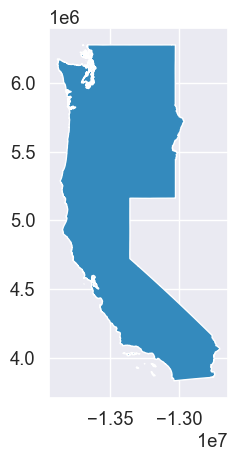

In [43]:
# prepare WECC boundary
from pygris import states
us_states = states(year = 2018)
region_states = us_states.loc[us_states['STUSPS'].isin(selected_states)]
region_states_boundary = region_states.dissolve()
region_states_boundary = region_states_boundary.to_crs(epsg=3857)
region_states_boundary.plot()
region_states_boundary

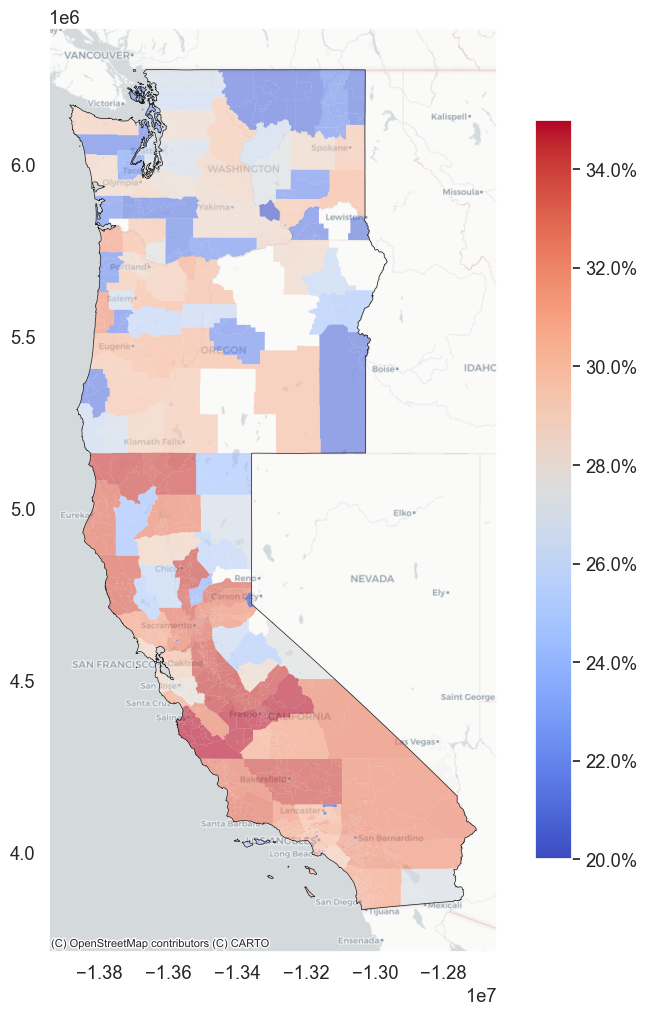

In [48]:
# plot EV penetration change under 2032

tracts_with_EV_diff = us_tracts_geojson.merge(ev_penetration_comparison, 
                                            on = 'home_GEOID',
                                            how = 'inner')
tracts_with_EV_diff.loc[:, 'EV_fraction_diff'] *= 100
tracts_with_EV_diff.loc[:, 'EV_fraction_base'] *= 100
ax = tracts_with_EV_diff.plot(figsize = (10,12), 
                              column = 'EV_fraction_diff', 
                              cmap='coolwarm',
                            alpha = 0.6, 
                              vmin = 20, vmax = 35, 
                              linewidth=0.01, legend=True,
                                legend_kwds = {'shrink': 0.8, 'format': '%.1f%%'})
region_states_boundary.plot(ax = ax, facecolor='none', edgecolor='k',linewidth = 0.5)
cx.add_basemap(ax, source = cx.providers.CartoDB.Positron)
ax.grid(False)
plt.savefig('Plot/' + region_code + '/' + region_code +'_map_EV_frac_delta_' + \
            output_name_comp + '.png', dpi = 200)

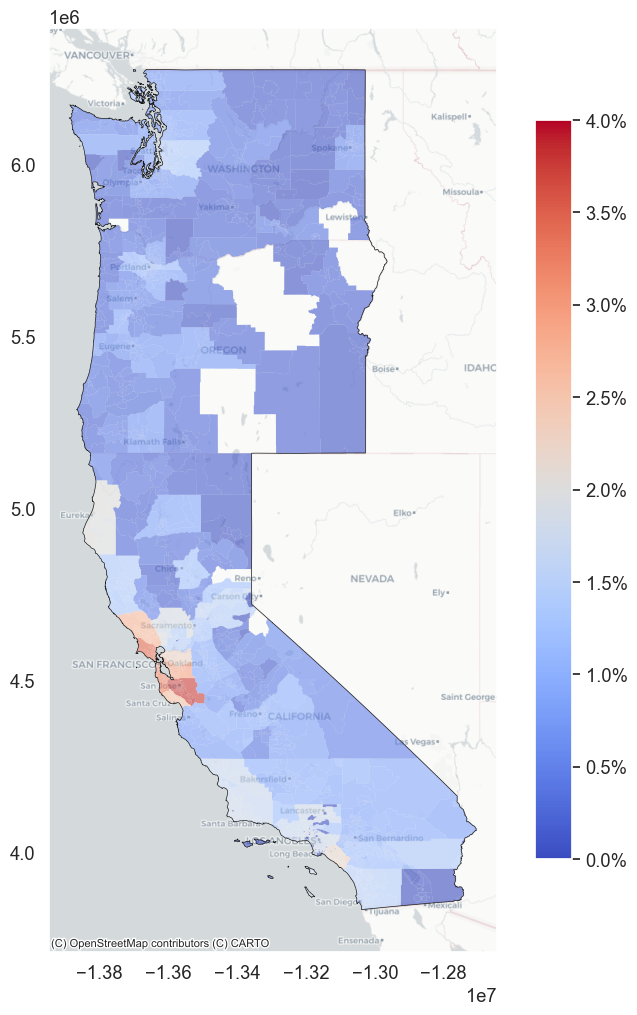

In [51]:
# plot EV penetration base under 2018

# tracts_with_EV_diff = us_tracts_geojson.merge(ev_penetration_comparison, 
#                                             on = 'home_GEOID',
#                                             how = 'inner')

ax = tracts_with_EV_diff.plot(figsize = (10,12), 
                              column = 'EV_fraction_base', 
                              cmap='coolwarm',
                            alpha = 0.6, 
                              vmin = 0, vmax = 4, 
                              linewidth=0.01, legend=True,
                                legend_kwds = {'shrink': 0.8, 'format': '%.1f%%'})
region_states_boundary.plot(ax = ax, facecolor='none', edgecolor='k',linewidth = 0.5)
cx.add_basemap(ax, source = cx.providers.CartoDB.Positron)
ax.grid(False)
plt.savefig('Plot/' + region_code + '/' + region_code +'_map_EV_frac_base_' + \
            output_name_comp + '.png', dpi = 200)

In [35]:
tracts_to_check = tracts_with_EV_diff.loc[tracts_with_EV_diff['st_code'] == 'WA']
# tracts_to_check.cbsaname.unique()
tracts_to_check.loc[tracts_to_check['cbsaname'] == 'Seattle-Tacoma-Bellevue, WA'].head(5)

,GEOID,NAME,geometry,home_GEOID,st_code,cbsa,cbsaname,NEVI_DAC,EV_fraction_base,EV_fraction_alt,EV_fraction_diff
9192,53033000100,"Census Tract 1, King County, Washington","MULTIPOLYGON (((-13613986.332 6062679.700, -13...",53033000100,WA,42660.0,"Seattle-Tacoma-Bellevue, WA",1.0,0.223463,0.234132,1.066940
9193,53033000200,"Census Tract 2, King County, Washington","MULTIPOLYGON (((-13616997.079 6060910.392, -13...",53033000200,WA,42660.0,"Seattle-Tacoma-Bellevue, WA",0.0,0.223339,0.233705,1.036595
9194,53033000300,"Census Tract 3, King County, Washington","MULTIPOLYGON (((-13619406.590 6062736.471, -13...",53033000300,WA,42660.0,"Seattle-Tacoma-Bellevue, WA",0.0,0.223627,0.234756,1.112924
9195,53033000401,"Census Tract 4.01, King County, Washington","MULTIPOLYGON (((-13621156.532 6062738.457, -13...",53033000401,WA,42660.0,"Seattle-Tacoma-Bellevue, WA",1.0,0.223312,0.233979,1.066743
9196,53033000402,"Census Tract 4.02, King County, Washington","MULTIPOLYGON (((-13621158.424 6061238.376, -13...",53033000402,WA,42660.0,"Seattle-Tacoma-Bellevue, WA",1.0,0.223526,0.234220,1.069379


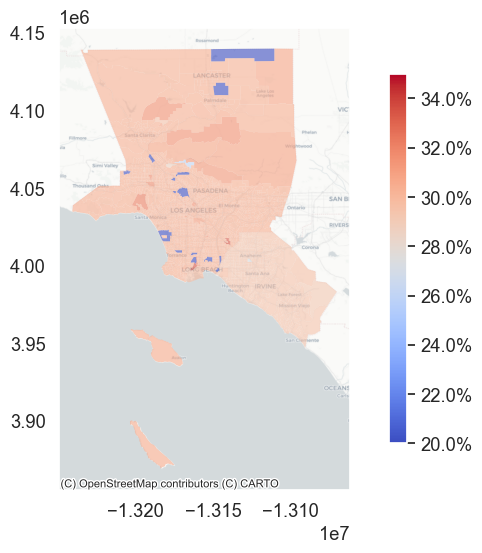

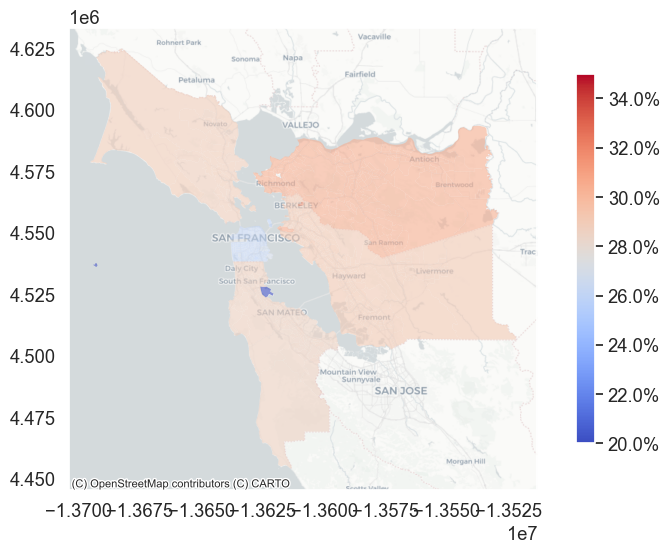

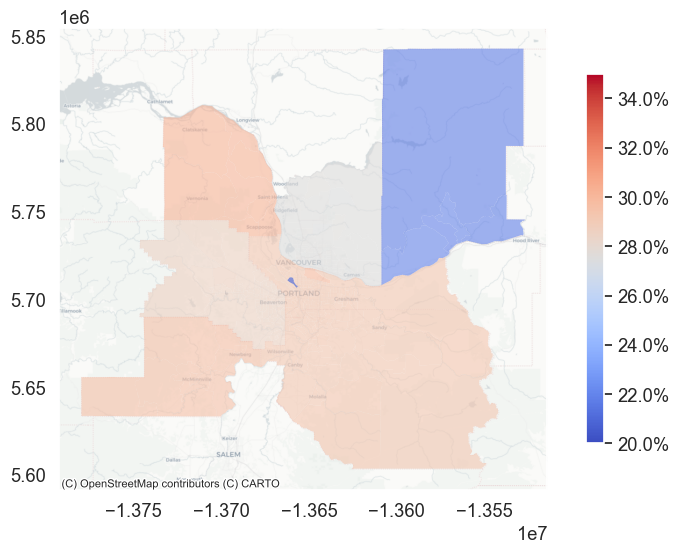

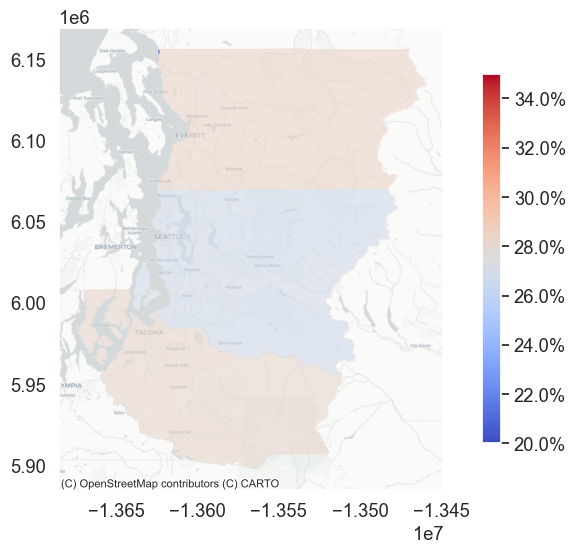

In [49]:
# selected_cbsas = [26420, 19100, 12420] # Houston, Dallas, Austin
selected_cbsas = [31080, 41860, 38900, 42660] # LA, SF, Portland, Seattle
for cbsa in selected_cbsas:
    regional_tracts_with_EV_diff = \
    tracts_with_EV_diff.loc[tracts_with_EV_diff['cbsa'] == cbsa]
    ax = regional_tracts_with_EV_diff.plot(figsize = (10,6), 
                                  column = 'EV_fraction_diff', cmap='coolwarm',
                                alpha = 0.6, vmin = 20, vmax = 35, linewidth=0.01,
                                  legend=True,
                                legend_kwds = {'shrink': 0.8, 'format': '%.1f%%'})
    cx.add_basemap(ax, source = cx.providers.CartoDB.Positron)
    ax.grid(False)
    plt.savefig('Plot/' + region_code + \
                '/region_' + str(cbsa) + '_EV_frac_delta_' + output_name_comp + '.png', dpi = 200)

In [52]:
# plot EV VMT penetration change under aggregisve scenario
# select data for plotting
base_scenario = '2018'
scenario_to_compare = '2032'
# selected_scenario = 'baseline'
output_name_comp = 'year_' + scenario_to_compare

criteria_1 = (EV_VMT_by_scenario['year'] == base_scenario) & \
(EV_VMT_by_scenario['type'] == 'Baseline') & (EV_VMT_by_scenario['VMT'] >= 5)
ev_vmt_baseline = EV_VMT_by_scenario.loc[criteria_1]
ev_vmt_baseline = ev_vmt_baseline[['thru_GEOID', 'NEVI_DAC', 'BEV_VMT_fraction']]
ev_vmt_baseline.columns = ['thru_GEOID', 'DACSTS', 'BEV_VMT_fraction_base']

criteria_2 = (EV_VMT_by_scenario['year'] == scenario_to_compare) & \
(EV_VMT_by_scenario['type'] == 'Baseline') & (EV_VMT_by_scenario['VMT'] >= 5)
ev_vmt_scenario = EV_VMT_by_scenario.loc[criteria_2]
ev_vmt_scenario = ev_vmt_scenario[['thru_GEOID', 'BEV_VMT_fraction']]
ev_vmt_scenario.columns = ['thru_GEOID', 'BEV_VMT_fraction_alt']

ev_vmt_comparison = pd.merge(ev_vmt_baseline, ev_vmt_scenario,
                                     on = 'thru_GEOID', how = 'left')

ev_vmt_comparison.loc[:, 'EV_vmt_fraction_diff'] = \
ev_vmt_comparison.loc[:, 'BEV_VMT_fraction_alt'] -\
ev_vmt_comparison.loc[:, 'BEV_VMT_fraction_base']

ev_vmt_comparison.head(4)


,thru_GEOID,DACSTS,BEV_VMT_fraction_base,BEV_VMT_fraction_alt,EV_vmt_fraction_diff
0,4001942600,1.0,0.005905,0.308857,0.302952
1,4001942700,1.0,0.005949,0.308764,0.302815
2,4001944000,1.0,0.006170,0.311134,0.304964
3,4001944100,1.0,0.005956,0.309066,0.303111


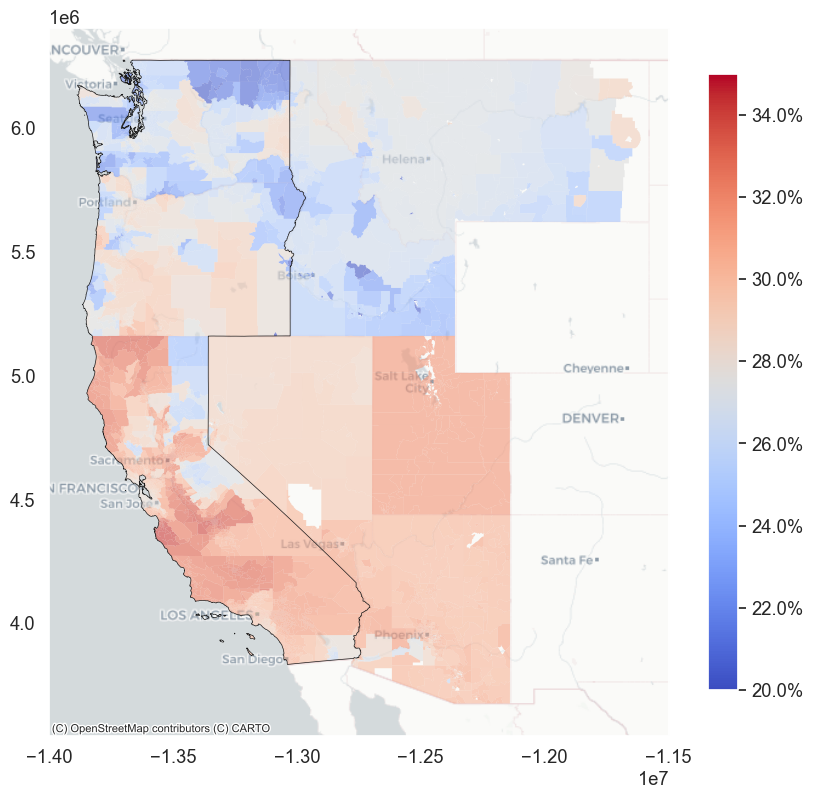

In [55]:

tracts_with_EV_diff = us_tracts_geojson.merge(ev_vmt_comparison,
                                                 left_on = 'home_GEOID',
                                                 right_on = 'thru_GEOID',
                                                 how = 'inner')
tracts_with_EV_diff.loc[:, 'EV_vmt_fraction_diff'] *= 100
tracts_with_EV_diff.loc[:, 'BEV_VMT_fraction_base'] *= 100
# dac_boundary = CA_tracts_with_EV_diff.loc[CA_tracts_with_EV_diff['DACSTS'] == 1]
ax = tracts_with_EV_diff.plot(figsize = (10,10), 
                              column = 'EV_vmt_fraction_diff', cmap='coolwarm',
                              alpha = 0.6, 
                              vmin = 20, vmax = 35, 
                              linewidth=0.01,
                              legend=True,
                              legend_kwds = {'shrink': 0.8, 'format': '%.1f%%'})
region_states_boundary.plot(ax = ax, facecolor='none', edgecolor='k',linewidth = 0.5)
cx.add_basemap(ax, source = cx.providers.CartoDB.Positron)
ax.grid(False)
plt.savefig('Plot/' + region_code + '/' + region_code + '_map_EV_VMT_frac_delta_' + \
            output_name_comp + '.png', dpi = 300)

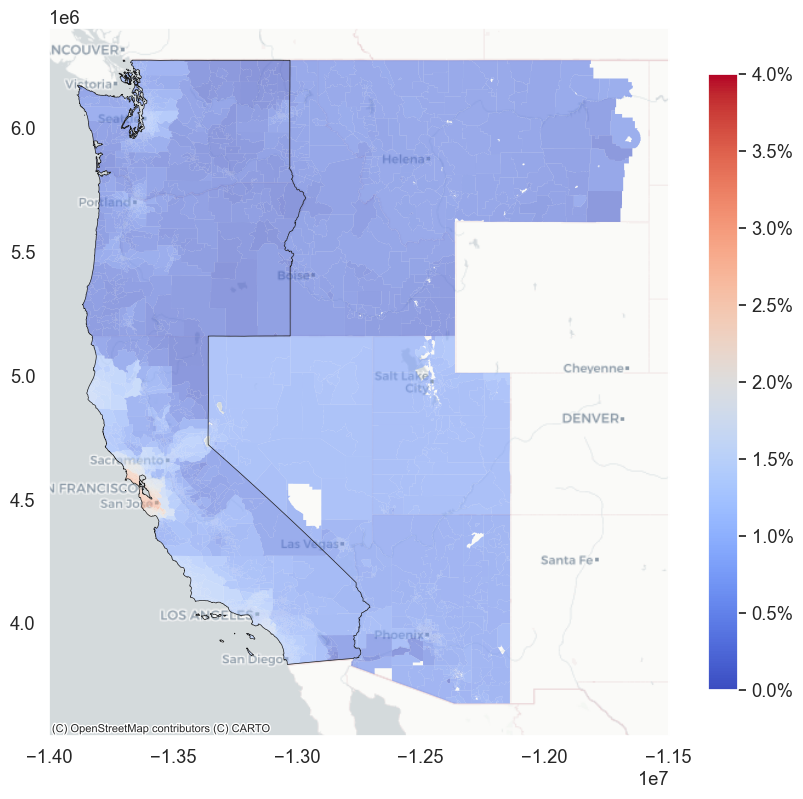

In [59]:
# plot baseline
ax = tracts_with_EV_diff.plot(figsize = (10,10), 
                              column = 'BEV_VMT_fraction_base', cmap='coolwarm',
                              alpha = 0.6, 
                              vmin = 0, vmax = 4, 
                              linewidth=0.01,
                              legend=True,
                              legend_kwds = {'shrink': 0.8, 'format': '%.1f%%'})
region_states_boundary.plot(ax = ax, facecolor='none', edgecolor='k',linewidth = 0.5)
cx.add_basemap(ax, source = cx.providers.CartoDB.Positron)
ax.grid(False)
plt.savefig('Plot/' + region_code + '/' + region_code + '_map_EV_VMT_frac_base_' + \
            output_name_comp + '.png', dpi = 300)

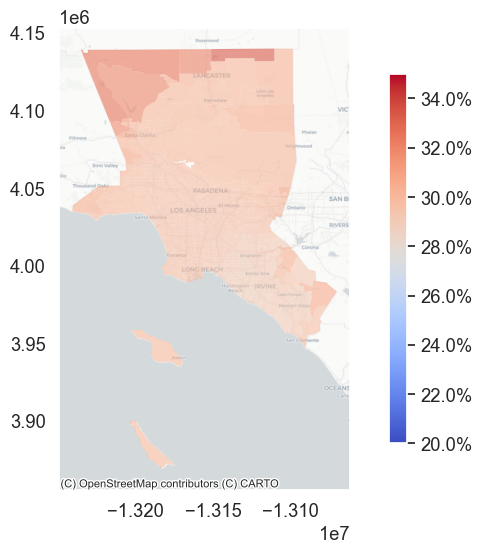

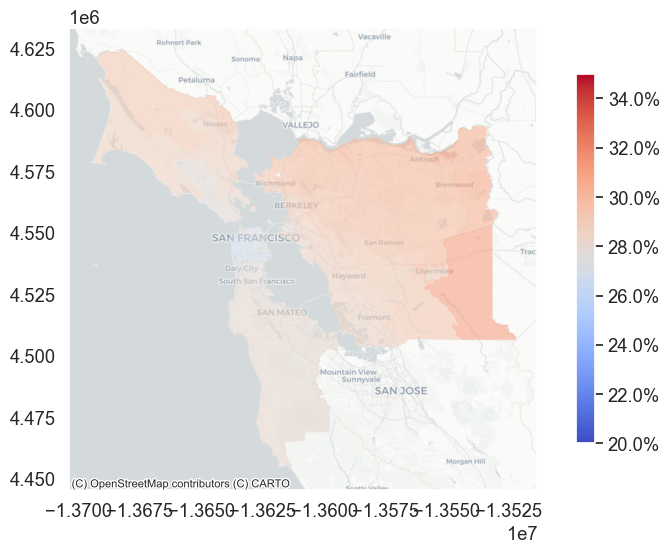

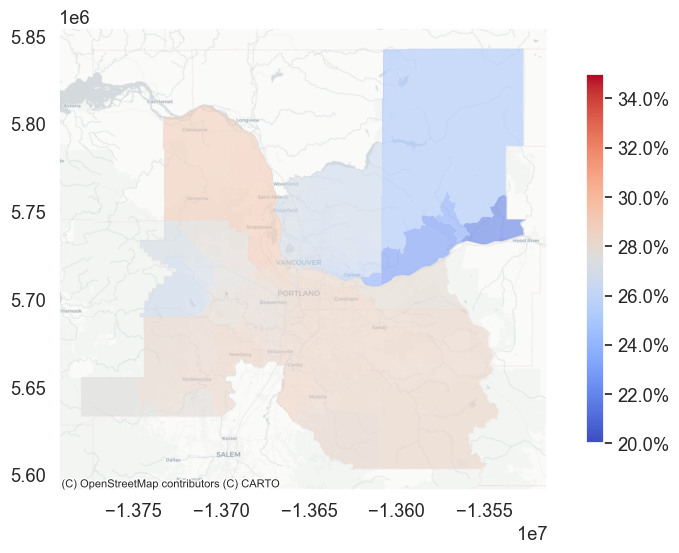

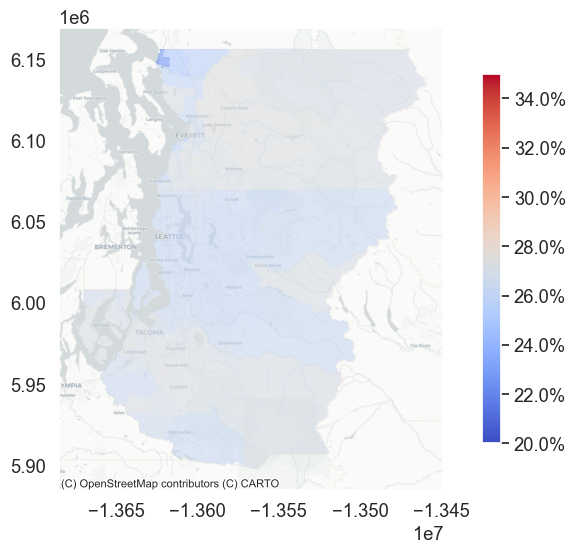

In [56]:
# plot EV VMT penetration change under aggregisve scenario - LA Region
# selected_cbsas = [26420, 19100, 12420] # Houston, Dallas, Austin
selected_cbsas = [31080, 41860, 38900, 42660] # LA, SF, Portland, Seattle
for cbsa in selected_cbsas:
    regional_tracts_with_EV_diff = \
    tracts_with_EV_diff.loc[tracts_with_EV_diff['cbsa'] == cbsa]
    ax = regional_tracts_with_EV_diff.plot(figsize = (10,6), 
                                  column = 'EV_vmt_fraction_diff', cmap='coolwarm',
                                alpha = 0.6, vmin = 20, vmax = 35, 
                                           linewidth=0.01,
                                  legend=True,
                                legend_kwds = {'shrink': 0.8, 'format': '%.1f%%'})
    cx.add_basemap(ax, source = cx.providers.CartoDB.Positron)
    ax.grid(False)
    plt.savefig('Plot/' + region_code + '/region_' + str(cbsa) + \
                '_EV_VMT_frac_delta_' + output_name_comp + '.png', dpi = 200)

## Part 4 - derive spillover and intrazonal fraction

In [39]:
NAVIGAT_VMT_output = None

grouping_var = ['thru_GEOID', 'thru_state', 'home_state',
                'populationGroupType', 'is_spillover', 
               'is_intrazonal', 'year',	'type']

veh_tech = ['BEV_100', 'BEV_300', 'FCEV', 'HEV_Gasoline',
       'ICEV_Gasoline', 'ICEV_NG', 'PHEV_25', 'PHEV_50']

EV_penetration_to_match = \
EV_penetration_by_scenario[['home_GEOID', 'BEV_100', 'BEV_300', 'FCEV', 'HEV_Gasoline',
       'ICEV_Gasoline', 'ICEV_NG', 'PHEV_25', 'PHEV_50', 
       'year', 'type']]
EV_penetration_to_match['home_GEOID'] = \
EV_penetration_to_match['home_GEOID'].astype(str).str.zfill(11)


for folder in selected_states:
    print(folder)
    if folder == '.DS_Store' or folder.endswith('csv'):
        continue
    path_to_results = os.path.join('Input', folder)
    file_name = 'BILDAQ_VMT_by_tract_multistate_spillover.csv'
    vmt_by_state = read_csv(os.path.join(path_to_results, file_name))
    vmt_by_state = vmt_by_state[['thru_GEOID', 'home_GEOID', 
                                 'populationGroupType',	'State', 'VMT']]
    vmt_by_state = vmt_by_state.loc[vmt_by_state['VMT'] > 1] # trim off small VMTs
    
    vmt_by_state['thru_GEOID'] = \
    vmt_by_state['thru_GEOID'].astype(str).str.zfill(11)
    
    vmt_by_state['home_GEOID'] = \
    vmt_by_state['home_GEOID'].astype(str).str.zfill(11)

    vmt_by_state['thru_state'] = \
    vmt_by_state['thru_GEOID'].str[:2]
    
    vmt_by_state['home_state'] = \
    vmt_by_state['home_GEOID'].str[:2]
    
    vmt_by_state['is_spillover'] = 0
    spillover_indx = (vmt_by_state['thru_state'] != vmt_by_state['home_state'])
    vmt_by_state.loc[spillover_indx, 'is_spillover'] = 1

    vmt_by_state['is_intrazonal'] = 0
    intrazonal_indx = (vmt_by_state['home_GEOID'] == vmt_by_state['thru_GEOID'])
    vmt_by_state.loc[intrazonal_indx, 'is_intrazonal'] = 1
    vmt_by_state = pd.merge(vmt_by_state, EV_penetration_to_match,
                            on = 'home_GEOID', how = 'left')
    output_attrs = []
    for veh in veh_tech:
        out_attr = veh + '_VMT'
        output_attrs.append(out_attr)
        vmt_by_state.loc[:, out_attr] = \
        vmt_by_state.loc[:, veh] * vmt_by_state.loc[:, 'VMT']
    vmt_by_state = vmt_by_state.groupby(grouping_var)[output_attrs].sum()
    vmt_by_state = vmt_by_state.reset_index()
    NAVIGAT_VMT_output = pd.concat([NAVIGAT_VMT_output, vmt_by_state])
    # break
NAVIGAT_VMT_output.head(10)

CA
OR
WA


,thru_GEOID,thru_state,home_state,populationGroupType,is_spillover,is_intrazonal,year,type,BEV_100_VMT,BEV_300_VMT,FCEV_VMT,HEV_Gasoline_VMT,ICEV_Gasoline_VMT,ICEV_NG_VMT,PHEV_25_VMT,PHEV_50_VMT
0,04001942600,04,06,high-income,1,0,2018,Baseline,21.546179,27.584431,0.000000,241.638599,10999.525613,1.445630,18.689443,17.374941
1,04001942600,04,06,high-income,1,0,2032,Baseline,260.610203,3085.782059,7.764674,283.115027,7468.830452,3.728234,48.020773,169.953414
2,04001942600,04,06,low-income,1,0,2018,Baseline,18.216413,24.191473,0.000000,202.621230,8446.577704,1.394448,15.976045,14.780958
3,04001942600,04,06,low-income,1,0,2032,Baseline,208.684014,2425.085645,5.589740,223.316312,5692.356222,3.074436,37.678102,127.973800
4,04001942600,04,06,medium-income,1,0,2018,Baseline,25.811839,33.690189,0.000000,291.194344,12830.684413,1.748313,22.551394,20.880202
5,04001942600,04,06,medium-income,1,0,2032,Baseline,308.099967,3629.831654,8.759198,333.792909,8688.432455,4.477314,56.354580,196.812617
6,04001942700,04,06,high-income,1,0,2018,Baseline,53.756249,68.317428,0.000000,597.087642,27157.840231,3.476255,46.458327,43.301975
7,04001942700,04,06,high-income,1,0,2032,Baseline,643.612483,7620.274611,19.170737,699.520671,18440.200292,9.064969,118.885440,419.508903
8,04001942700,04,06,low-income,1,0,2018,Baseline,42.402379,56.620506,0.000000,473.442672,19818.185197,3.241756,37.224827,34.450067
9,04001942700,04,06,low-income,1,0,2032,Baseline,488.261325,5680.635216,13.191758,523.405538,13363.818772,7.348864,88.187268,300.718662


In [41]:
home_states = NAVIGAT_VMT_output['home_state'].unique()
NAVIGAT_VMT_output = \
NAVIGAT_VMT_output.loc[NAVIGAT_VMT_output['thru_state'].isin(home_states)]
# remove VMT that are unadjusted

NAVIGAT_VMT_output.loc[:, 'ICEV_VMT'] = NAVIGAT_VMT_output.loc[:, 'HEV_Gasoline_VMT'] + \
NAVIGAT_VMT_output.loc[:, 'ICEV_Gasoline_VMT'] + NAVIGAT_VMT_output.loc[:, 'ICEV_NG_VMT'] + \
0.78 * NAVIGAT_VMT_output.loc[:, 'PHEV_25_VMT'] + 0.38 * NAVIGAT_VMT_output.loc[:, 'PHEV_50_VMT'] 

NAVIGAT_VMT_output.loc[:, 'EV_VMT'] = NAVIGAT_VMT_output.loc[:, 'BEV_100_VMT'] + \
NAVIGAT_VMT_output.loc[:, 'BEV_300_VMT'] + NAVIGAT_VMT_output.loc[:, 'FCEV_VMT'] + \
0.22 * NAVIGAT_VMT_output.loc[:, 'PHEV_25_VMT'] + 0.62 * NAVIGAT_VMT_output.loc[:, 'PHEV_50_VMT']

In [43]:
NAVIGAT_VMT_spillover = \
NAVIGAT_VMT_output.groupby(['year', 'is_spillover'])[['ICEV_VMT', 'EV_VMT']].sum()
NAVIGAT_VMT_spillover = NAVIGAT_VMT_spillover.reset_index()
NAVIGAT_VMT_spillover.to_csv(os.path.join('Output', region_code, 'VMT_by_spillover.csv'))
print(NAVIGAT_VMT_spillover)

NAVIGAT_VMT_intrazonal = \
NAVIGAT_VMT_output.groupby(['year', 'is_intrazonal'])[['ICEV_VMT', 'EV_VMT']].sum()
NAVIGAT_VMT_intrazonal = NAVIGAT_VMT_intrazonal.reset_index()
NAVIGAT_VMT_intrazonal.to_csv(os.path.join('Output', region_code, 'VMT_by_intrazonal.csv'))
print(NAVIGAT_VMT_intrazonal)

   year  is_spillover      ICEV_VMT        EV_VMT
0  2018             0  1.002737e+09  1.178393e+07
1  2018             1  1.274993e+07  4.479258e+04
2  2032             0  7.018004e+08  3.127203e+08
3  2032             1  9.086642e+06  3.708081e+06
   year  is_intrazonal      ICEV_VMT        EV_VMT
0  2018              0  9.278991e+08  1.091573e+07
1  2018              1  8.758758e+07  9.129898e+05
2  2032              0  6.493748e+08  2.894400e+08
3  2032              1  6.151227e+07  2.698830e+07
